# Oura Data Analysis

## About Oura Data Analysis

This project provides some high-level data analysis of sleep, readiness and activity data from Oura Ring tracking.

Please using oura_downloader file to first collect and export your data. 

-------

### Dependencies and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime
import seaborn
%matplotlib inline

-------

# Sleep

In [2]:
daily_sleep = pd.read_csv('data/daily_sleep.csv', encoding='utf-8')
len(daily_sleep)

18

In [3]:
daily_sleep['Date'] = pd.to_datetime(daily_sleep['summary_date'])
daily_sleep['bedtime_end'] = pd.to_datetime(daily_sleep['bedtime_end'])
daily_sleep['bedtime_start'] = pd.to_datetime(daily_sleep['bedtime_start'])

In [4]:
daily_sleep['dow'] = daily_sleep['Date'].dt.weekday
daily_sleep['day_of_week'] = daily_sleep['Date'].dt.weekday_name

In [5]:
daily_sleep['day_of_week'] = daily_sleep["day_of_week"].astype('category')

In [6]:
# sleep_data['InBedHours'] = round((sleep_data.InBed / 60), 2)

In [7]:
# sleep_data = sleep_data[sleep_data.Sleep > 0]

In [8]:
len(daily_sleep)

18

In [9]:
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 41 columns):
awake                          18 non-null int64
bedtime_end                    18 non-null datetime64[ns, pytz.FixedOffset(-420)]
bedtime_end_delta              18 non-null int64
bedtime_start                  18 non-null datetime64[ns, pytz.FixedOffset(-420)]
bedtime_start_delta            18 non-null int64
breath_average                 18 non-null float64
deep                           18 non-null int64
duration                       18 non-null int64
efficiency                     18 non-null int64
hr_5min                        18 non-null object
hr_average                     18 non-null float64
hr_lowest                      18 non-null int64
hypnogram_5min                 18 non-null object
is_longest                     18 non-null int64
light                          18 non-null int64
midpoint_at_delta              18 non-null int64
midpoint_time                  18 non-nul

In [10]:
# daily_sleep.tail()

In [11]:
# daily_sleep.describe()

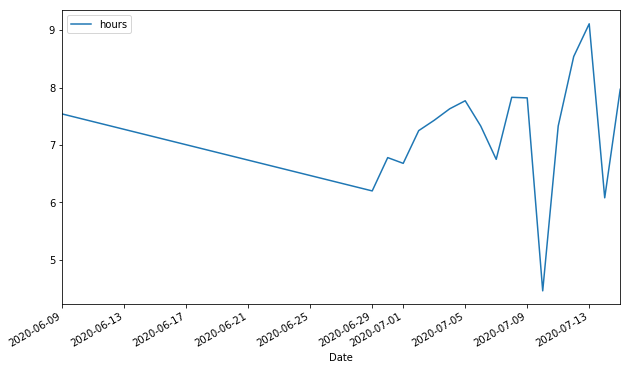

In [12]:
daily_sleep.plot(x='Date', y='hours', figsize=[10, 6])

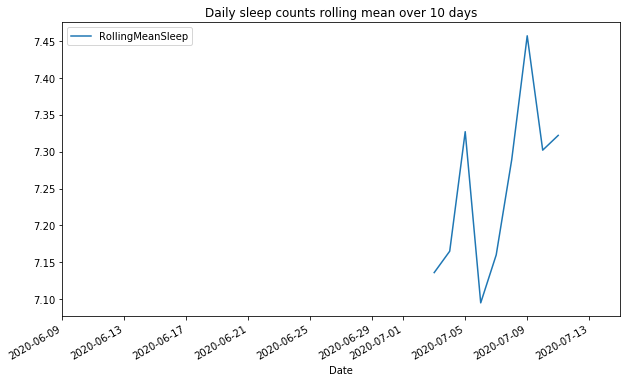

In [13]:
daily_sleep['RollingMeanSleep'] = daily_sleep['hours'].rolling(window=10, center=True).mean()
daily_sleep.plot(x='Date', y='RollingMeanSleep', title= 'Daily sleep counts rolling mean over 10 days', figsize=[10, 6])

In [14]:
daily_sleep.groupby(['dow'])['hours'].mean()

dow
0    7.546667
1    6.787500
2    7.493333
3    7.535000
4    5.945000
5    7.480000
6    8.155000
Name: hours, dtype: float64

Text(0.5, 0, 'Day of Week')

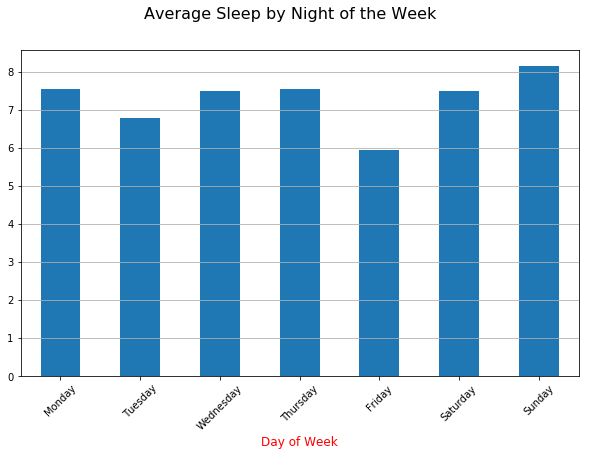

In [15]:
data = daily_sleep.groupby(['dow'])['hours'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Sleep by Night of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')